<a href="https://colab.research.google.com/github/joshuansu0897/NN_Examples/blob/main/clasificacion_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

**Descargamos los datos**

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

In [ ]:
train_data[0]

In [7]:
train_labels[0]

1

**Convertir los numeros en las palabras**

In [3]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# vamos a cambiar de lugar las cosas, ahora el numero sera el id en vez de la palabra
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
word_index

**Verificamos que funcione el diccionario de palabras**

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_ - 3))

**Creamos el metodo de vectorizacion**

In [5]:
def vectorizar(sequences, dim=10_000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

**Vamos a crear nuestros datos de entrenamiento**

In [6]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Creamos los datos de validacion**

In [8]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

**Sigue crear nuestra estructura o modelo**

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

**Sigue entrenar a la red**

In [11]:
# esto es usando los datos que separamos arriba, los x_val y y_val
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

# esto es sin la necesidad de separar los datos, es mas rapido
# history = model.fit(
#     partial_x_train,
#     partial_y_train,
#     epochs=4,
#     batch_size=512,
#     validation_split=0.3 # el 30 porciento se usa para validar
# )

Epoch 1/20
30/30 [==============================] - 3s 44ms/step - loss: 0.5005 - accuracy: 0.7901 - val_loss: 0.3703 - val_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2936 - accuracy: 0.9051 - val_loss: 0.3072 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2181 - accuracy: 0.9244 - val_loss: 0.2848 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1688 - accuracy: 0.9463 - val_loss: 0.3048 - val_accuracy: 0.8764
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1357 - accuracy: 0.9576 - val_loss: 0.2826 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1122 - accuracy: 0.9668 - val_loss: 0.3066 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0925 - accuracy: 0.9721 - val_loss: 0.3110 - val_accuracy: 0.8839
Epoch 8/20
30

**Visualizamos el resultado de la red**

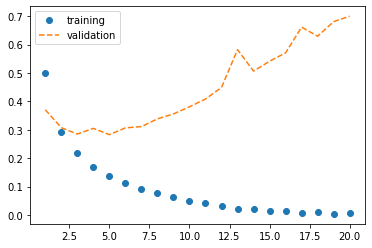

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

**Se estanco en la validacion, eso significa que tenemos** *Overfitting*

In [16]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7676 - accuracy: 0.8527


[0.7676193118095398, 0.8526800274848938]

**Intentando con un modelo menos Complejo**

In [13]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10_000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history2 = model2.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6112 - accuracy: 0.6709 - val_loss: 0.5867 - val_accuracy: 0.6164
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5154 - accuracy: 0.8018 - val_loss: 0.5142 - val_accuracy: 0.8137
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4672 - accuracy: 0.8654 - val_loss: 0.4929 - val_accuracy: 0.8182
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4336 - accuracy: 0.8961 - val_loss: 0.4709 - val_accuracy: 0.8722
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4076 - accuracy: 0.9199 - val_loss: 0.4650 - val_accuracy: 0.8608
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3861 - accuracy: 0.9318 - val_loss: 0.4528 - val_accuracy: 0.8796
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3671 - accuracy: 0.9455 - val_loss: 0.4606 - val_accuracy: 0.8640
Epoch 8/20
30

In [18]:
model2.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4491 - accuracy: 0.8613


[0.449066162109375, 0.8613200187683105]

**Comparamos los modelos**

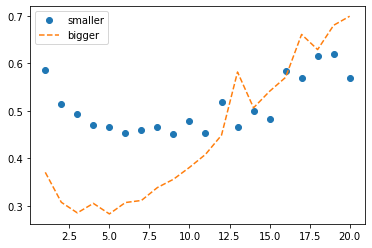

In [14]:
history_dict = history.history
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values2, 'o', label = 'smaller')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

**Agregando Regularizacion**

In [15]:
from keras import regularizers

In [16]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10_000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history3 = model3.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5965 - accuracy: 0.7841 - val_loss: 0.4803 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4050 - accuracy: 0.8905 - val_loss: 0.3880 - val_accuracy: 0.8759
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3206 - accuracy: 0.9128 - val_loss: 0.3478 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2792 - accuracy: 0.9247 - val_loss: 0.3352 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2551 - accuracy: 0.9338 - val_loss: 0.3416 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2404 - accuracy: 0.9396 - val_loss: 0.3420 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2263 - accuracy: 0.9457 - val_loss: 0.3585 - val_accuracy: 0.8802
Epoch 8/20
30

In [22]:
model3.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.4890 - accuracy: 0.8524


[0.4890076816082001, 0.8524399995803833]

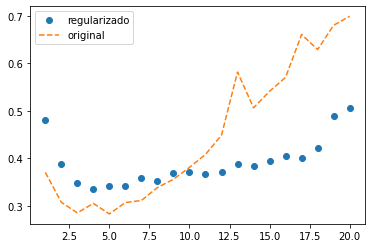

In [17]:
history_dict = history.history
val_loss_values = history_dict['val_loss']
val_loss_values3 = history3.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values3, 'o', label = 'regularizado')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

**Aplicando Dropout**

In [18]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model4.add(layers.Dropout(0.5)) # desactiva el 50% de nuestras neuronas en cada iteracion
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5)) # desactiva el 50% de nuestras neuronas en cada iteracion
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history4 = model4.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6293 - accuracy: 0.6534 - val_loss: 0.5169 - val_accuracy: 0.8414
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5128 - accuracy: 0.7700 - val_loss: 0.4188 - val_accuracy: 0.8634
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4364 - accuracy: 0.8229 - val_loss: 0.3534 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3712 - accuracy: 0.8590 - val_loss: 0.3104 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3247 - accuracy: 0.8855 - val_loss: 0.2986 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2803 - accuracy: 0.9061 - val_loss: 0.2798 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2442 - accuracy: 0.9219 - val_loss: 0.2804 - val_accuracy: 0.8891
Epoch 8/20
30

In [25]:
model4.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.5895 - accuracy: 0.8707


[0.5895393490791321, 0.8707200288772583]

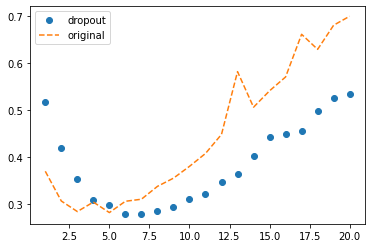

In [19]:
history_dict = history.history
val_loss_values = history_dict['val_loss']
val_loss_values4 = history4.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values4, 'o', label = 'dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

In [24]:
model5 = models.Sequential()
model5.add(layers.Dense(6, activation='relu', input_shape=(10_000,)))
model5.add(layers.Dropout(0.50)) # desactiva el 50% de nuestras neuronas en cada iteracion
model5.add(layers.Dense(6, activation='relu'))
model5.add(layers.Dropout(0.50)) # desactiva el 50% de nuestras neuronas en cada iteracion
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history5 = model5.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6536 - accuracy: 0.6007 - val_loss: 0.5986 - val_accuracy: 0.8273
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5887 - accuracy: 0.6812 - val_loss: 0.5235 - val_accuracy: 0.8524
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5425 - accuracy: 0.7136 - val_loss: 0.4695 - val_accuracy: 0.8720
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5090 - accuracy: 0.7342 - val_loss: 0.4333 - val_accuracy: 0.8742
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4809 - accuracy: 0.7446 - val_loss: 0.3954 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4578 - accuracy: 0.7603 - val_loss: 0.3626 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4353 - accuracy: 0.7834 - val_loss: 0.3502 - val_accuracy: 0.8857
Epoch 8/20
30

In [26]:
model5.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3528 - accuracy: 0.8778


[0.3527578115463257, 0.8777999877929688]

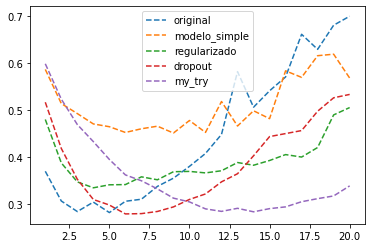

In [25]:
history_dict = history.history
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']
val_loss_values3 = history3.history['val_loss']
val_loss_values4 = history4.history['val_loss']
val_loss_values5 = history5.history['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.plot(epoch, val_loss_values2, '--', label = 'modelo_simple')
plt.plot(epoch, val_loss_values3, '--', label = 'regularizado')
plt.plot(epoch, val_loss_values4, '--', label = 'dropout')
plt.plot(epoch, val_loss_values5, '--', label = 'my_try')
plt.legend()
plt.show()